![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

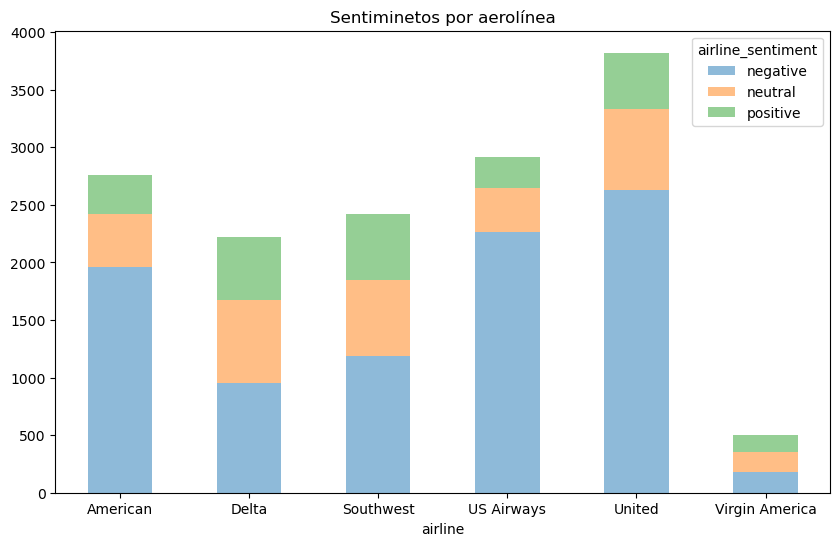

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1

from sklearn.metrics import accuracy_score
vect_A = CountVectorizer()
X_dtm_A = vect_A.fit_transform(X_train)
model = RandomForestClassifier().fit(X_dtm_A,y_train)
X_test_dtm_A=vect_A.transform(X_test)
y_pred_A = model.predict(X_test_dtm_A)
accuracy1=accuracy_score(y_test, y_pred_A)
# Imprimir resultado
print('El Accuracy del modelo es: {:.3f}'.format(accuracy1))

El Accuracy del modelo es: 0.773


Usando la función CountVectorizer, la cual convierte el texto de los tweets de la variable X_train en una representación numérica que puede ser utilizada por el modelo de random forest, se obtuvo un "Accuracy" de 0.773, esto nos indica que el modelo clasifica correctamente los sentimientos en los tweets, sin embargo es posible mejorar el desempeño optimizando los parámetros del modelo.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2

vect_B = CountVectorizer(stop_words='english')
X_dtm_B = vect_B.fit_transform(X_train)
model = RandomForestClassifier().fit(X_dtm_B,y_train)
X_test_dtm_B=vect_B.transform(X_test)
y_pred_B = model.predict(X_test_dtm_B)
accuracy2=accuracy_score(y_test, y_pred_B)
# Imprimir resultado
print('El Accuracy del modelo es: {:.3f}'.format(accuracy2))

El Accuracy del modelo es: 0.764


Utilizando la eliminación de Stopwords, la cual elimina palabras en inglés que no aportan a la clasificación como: the, is, a... antes de la vectorización, se obtuvo una "accuracy" de 0.764, aunque cumple con la clasificación el desempeño es menor que el punto 1. Es probable que al menos una de las stop words que se removieron tengan poder predictivo.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
#pip install nltk

In [14]:
# Celda 3

import nltk
nltk.download('wordnet')
#nltk.download()
wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
X_dtm_C = vect_lemas.fit_transform(X_train)
model = RandomForestClassifier().fit(X_dtm_C,y_train)
X_test_dtm_C=vect_lemas.transform(X_test)
y_pred_C = model.predict(X_test_dtm_C)
accuracy3=accuracy_score(y_test, y_pred_C)
# Imprimir resultado
print('El Accuracy del modelo es: {:.3f}'.format(accuracy3))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DubanPedraza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


El Accuracy del modelo es: 0.760


Al aplicar Lematización con verbos se realiza una transformación de las formas verbales de los tweets a su forma base o lema, esto ayuda a reducir la variabilidad de las palabras, obteniendo una "Accuracy" del modelo de 0.760.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 4

nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    lemmas = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words] # se agrega pos='v' para lematizar verbos
    return lemmas

vect_lemas2 = CountVectorizer(stop_words='english', analyzer=split_into_lemmas)
X_dtm_D = vect_lemas2.fit_transform(X_train)
model = RandomForestClassifier().fit(X_dtm_D, y_train)
X_test_dtm_D = vect_lemas2.transform(X_test)
y_pred_D = model.predict(X_test_dtm_D)
accuracy4 = accuracy_score(y_test, y_pred_D)

print('El Accuracy del modelo es: {:.3f}'.format(accuracy4))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DubanPedraza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


El Accuracy del modelo es: 0.760


En este punto se utilizarón las 3 técnicas anteriores al tiempo sin embargo se puede evidenciar que el "Accuracy" no aumenta considerablemente ya que alcanza un valor de 0.760, el cual sigue siendo inferior al aplicar solo CountVectorizer del punto 1 Y al aplicar stopwords del punto 2. En este caso el accuracy del punto 3 y 4 son iguales. 

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

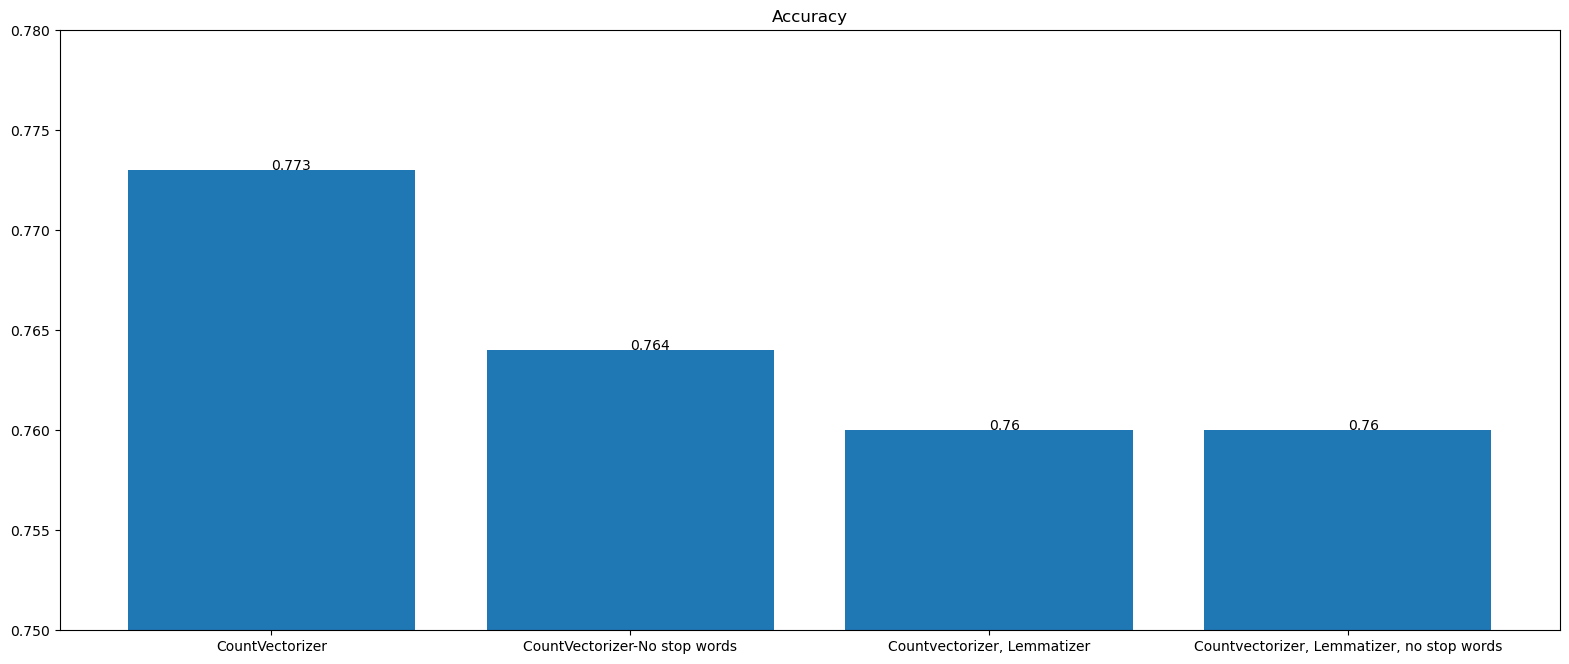

In [16]:
# Celda 5

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
ax = fig.add_axes([0,0,1,1])

ax.set_title("Accuracy")
ejeX = ['CountVectorizer','CountVectorizer-No stop words','Countvectorizer, Lemmatizer','Countvectorizer, Lemmatizer, no stop words']
ejeY = [round(accuracy1,3), round(accuracy2,3), round(accuracy3,3),round(accuracy4,3) ]
ax.bar(ejeX,ejeY)
plt.ylim(0.75,0.78)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Como conclusión general el modelo que utiliza solo CountVectorizer obtuvo el mejor desempeño con un "Accuracy" de 0.773, mientras que los modelos que utilizan Lematización obtienen el desempeño mas bajo con un "Accuracy" de 0.760.

* Ventajas del mejor modelo:
La técnica de CountVectorizer convierte el texto en vectores numéricos, lo que facilita el procesamiento y análisis de datos de texto para modelos de machine learning.

* Desventajas de los modelos con bajo desempeño:
Es posible que la técnica de lematización no sea muy precisa en la identificación de las raíces de las palabras al igual que la técnica de no stop words puede que elimine palabras que aportan al modelo o incluir palabras que no son relevantes, esto puede afectar la calidad de los datos procesados.